# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [406]:
import importlib
from datetime import timedelta
import pandas as pd

import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot as plt

import util
import main

importlib.reload(util)
importlib.reload(main)

<module 'main' from '/Users/yaskovdev/dev/git_home/sandbox/service-instance-estimation/main.py'>

In [448]:
df = pd.read_csv('~/dev/tmpA7D1.tmp.txt', sep='\t')
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

sessions = list(zip(df['StartTime'], df['EndTime']))
sessions = [session for session in sessions if session[0] < session[1]]

Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([20223.80972222222, ..., 20224.75]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1355 ticks ([2022

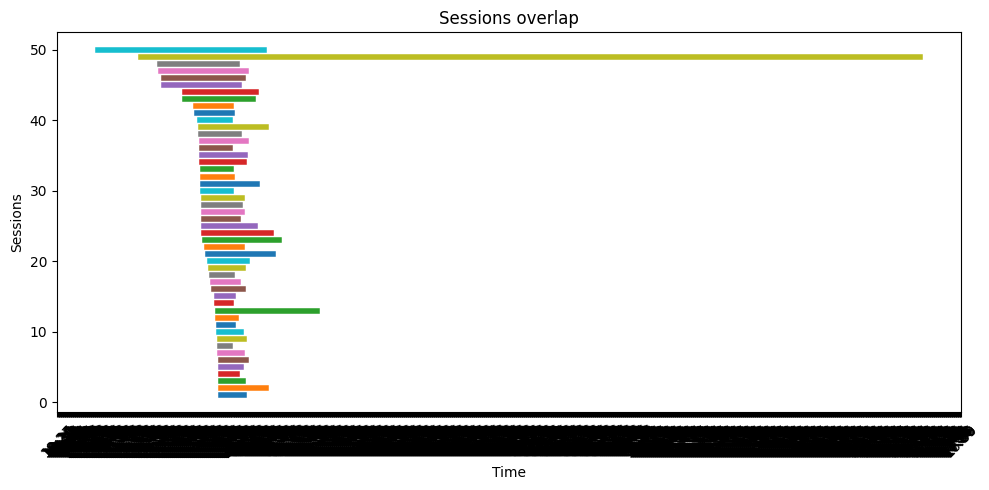

In [455]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, (start, end) in enumerate(sorted(sessions[:50], key=lambda x: x[0])):
    ax.plot([start, end], [i + 1, i + 1], label=f"Session {i + 1}", linewidth=4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.xticks(rotation=45)

ax.set_xlabel("Time")
ax.set_ylabel("Sessions")
ax.set_title("Sessions overlap")

plt.tight_layout()
plt.show()

In [450]:
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f} s"

    minutes, seconds = divmod(seconds, 60)
    if minutes < 60:
        return f"{int(minutes)}m {seconds:.1f}s"

    hours, minutes = divmod(minutes, 60)
    return f"{int(hours)}h {int(minutes)}m {seconds:.1f}s"

In [453]:
total_composers = 250
composition_speed = 2
delay_threshold_s = timedelta(minutes=2).total_seconds()
delays_s = main.calculate_delays_s(sessions, total_composers, composition_speed)

delays_s_np = np.array(delays_s)

Top 100 delays in s: [3280.602, 3279.3265, 3279.021, 3277.336, 3276.773, 3276.024, 3275.708, 3275.418, 3274.213, 3272.7855, 3270.456, 3270.1065, 3269.6135, 3269.3435, 3266.517, 3265.4585, 3265.246, 3265.2015, 3265.0995, 3264.5655, 3264.311, 3263.591, 3263.384, 3263.296, 3261.7555, 3261.57, 3261.252, 3261.0635, 3260.9725, 3260.001, 3259.537, 3258.6925, 3257.703, 3257.3505, 3257.1485, 3257.053, 3256.799, 3256.59, 3256.3315, 3255.939, 3255.338, 3255.0095, 3254.8645, 3254.6695, 3254.492, 3254.451, 3254.3505, 3253.2925, 3252.9245, 3252.337, 3252.0125, 3251.8675, 3251.5305, 3251.0125, 3250.2035, 3250.201, 3250.1365, 3249.5045, 3249.1305, 3249.016, 3248.648, 3248.425, 3248.3105, 3248.3025, 3247.992, 3247.763, 3247.422, 3247.4015, 3247.239, 3247.1, 3246.944, 3246.7035, 3246.625, 3246.5465, 3246.503, 3246.1365, 3246.0295, 3245.489, 3245.249, 3245.2165, 3245.1925, 3244.6735, 3244.451, 3243.777, 3243.6775, 3243.6675, 3242.9345, 3242.0205, 3241.8265, 3241.4645, 3241.234, 3241.15, 3241.0055, 3240.7

In [454]:
statistics = {
    "max_delay": delays_s_np.max(),
    "avg_delay": delays_s_np.mean(),
    "95th_percentile": np.percentile(delays_s_np, 95),
    "percent_under_threshold": (delays_s_np <= delay_threshold_s).mean() * 100,
    "delays": delays_s,
}

print(f"Top 100 delays in s: {sorted(delays_s, reverse=True)[:100]}")

meets_sla = statistics['95th_percentile'] <= delay_threshold_s
status = "✅ OK" if meets_sla else "❌ FAIL"

print(f"{total_composers} instances: "
      f"Max delay = {format_time(statistics['max_delay'])}, "
      f"Avg delay = {format_time(statistics['avg_delay'])}, "
      f"95th = {format_time(statistics['95th_percentile'])}, "
      f"→ {status}")

Top 100 delays in s: [3280.602, 3279.3265, 3279.021, 3277.336, 3276.773, 3276.024, 3275.708, 3275.418, 3274.213, 3272.7855, 3270.456, 3270.1065, 3269.6135, 3269.3435, 3266.517, 3265.4585, 3265.246, 3265.2015, 3265.0995, 3264.5655, 3264.311, 3263.591, 3263.384, 3263.296, 3261.7555, 3261.57, 3261.252, 3261.0635, 3260.9725, 3260.001, 3259.537, 3258.6925, 3257.703, 3257.3505, 3257.1485, 3257.053, 3256.799, 3256.59, 3256.3315, 3255.939, 3255.338, 3255.0095, 3254.8645, 3254.6695, 3254.492, 3254.451, 3254.3505, 3253.2925, 3252.9245, 3252.337, 3252.0125, 3251.8675, 3251.5305, 3251.0125, 3250.2035, 3250.201, 3250.1365, 3249.5045, 3249.1305, 3249.016, 3248.648, 3248.425, 3248.3105, 3248.3025, 3247.992, 3247.763, 3247.422, 3247.4015, 3247.239, 3247.1, 3246.944, 3246.7035, 3246.625, 3246.5465, 3246.503, 3246.1365, 3246.0295, 3245.489, 3245.249, 3245.2165, 3245.1925, 3244.6735, 3244.451, 3243.777, 3243.6775, 3243.6675, 3242.9345, 3242.0205, 3241.8265, 3241.4645, 3241.234, 3241.15, 3241.0055, 3240.7